In [1]:
import sys 
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2
import matplotlib
from multiprocessing import Pool
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 
import Hyperparam_Testing.Testing_Notebooks.chirallag as cL


matplotlib.rcParams.update({'legend.fontsize': 26})
matplotlib.rcParams.update({'font.size': 26})
matplotlib.rcParams.update({'text.usetex': True})
#matplotlib.rcParams.update({'font.family': 'serif'})
matplotlib.rcParams.update({'text.latex.preamble': r'\usepackage{times}'})
matplotlib.rcParams.update({'text.latex.preamble': r'\usepackage{amsmath}'})
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

In [2]:
data = cf.noisy(0).data(10**7,1,0,1)


In [13]:
from sklearn.model_selection import train_test_split as tts
train_x ,val_x ,train_y,val_y  = tts(data[:,:-1],data[:,-1],test_size = 0.1)


In [14]:
print(train_x.shape, train_y.shape, val_y.shape)

(9000000, 16) (9000000,) (1000000,)


In [5]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))
#train_x, train_y = df_pions[:-10000,:-1], (-df_pions[:-10000,-1])
#val_x, val_y = df_pions[-10000:,:-1], (-df_pions[-10000:,-1])



In [6]:
unshuffled_potential_values = df_pions[:,-1].copy()
shufffled_potential_values = unshuffled_potential_values.copy()
np.random.shuffle(shufffled_potential_values)
random_mean_absolute_errro = np.mean(abs(unshuffled_potential_values-shufffled_potential_values/unshuffled_potential_values))
print('Random mape = ',random_mean_absolute_errro)
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))

Random mape =  1.9083768477120424
Mean Potential Value =  -0.13889586045126806


No handles with labels found to put in legend.


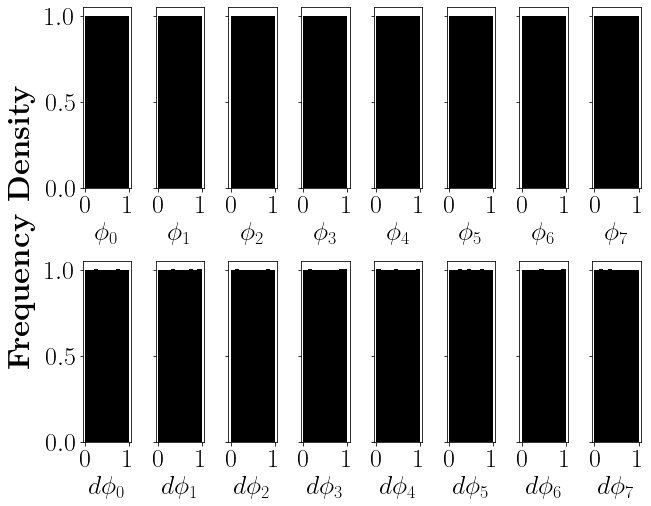

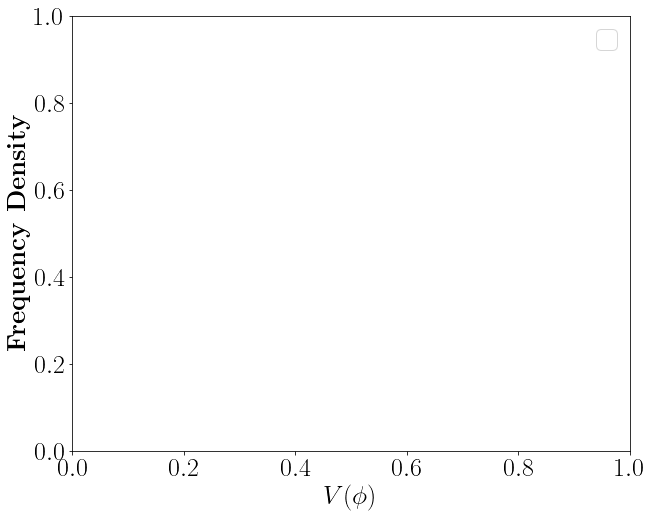

In [7]:
fig , ax = plt.subplots(2,8,sharey= True, figsize = (10,8))
plt.subplots_adjust(hspace= 0.4,wspace= 0.5)
for i in range(8):
    ax[0,i].hist(train_x[:,i], density = True, color = 'black') 
    ax[0,i].set_xticks([0,1])
    ax[1,i].set_xticks([0,1])
    ax[1,i].hist(train_x[:,8+i],density = True, color = 'black')
    ax[0,i].set_xlabel('$\phi_{{{}}}$'.format(i))
    ax[1,i].set_xlabel('$d\phi_{{{}}}$'.format(i))
fig.supylabel(r'\textbf{Frequency Density}')
fig_2 = plt.figure(figsize= (10,8))
#plt.hist(train_y,density= True, bins = 1000, color = 'black',label=  '$\phi \sim U^{1/4}$')
#plt.hist(df_pions[:,-1],density= True, bins = 1000, color = 'blue',label=  '$\phi \sim U^{1/4}$' )
plt.xlabel('$V(\phi)$')
plt.ylabel(r'\textbf{Frequency Density}')
plt.legend()
#plt.tight_layout()
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/phi0.25.png',dpi = 400)
fig_2.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/pot.png',dpi = 400)

In [8]:
opt = keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.98)


In [9]:

model = models.Sequential()

model.add(layers.Input(train_x.shape[1]))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(1))
model.compile(optimizer = opt,loss = 'mape', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 301       
Total params: 366,601
Trainable params: 366,601
Non-trainable params: 0
__________________________________________________

2022-03-16 10:48:23.319254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 10:48:23.342286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 10:48:23.342624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 10:48:23.343225: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
epoch_num = 100
train_x.shape


(9000000, 16)

In [15]:

model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= 32 , epochs = epoch_num)

2022-03-16 11:02:05.006144: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
281250/281250 [==============================] - 298s 1ms/step - loss: 5.4344 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 5.4344 - val_loss: 3.6211 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 3.6211
Epoch 2/100
281250/281250 [==============================] - 296s 1ms/step - loss: 3.7340 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 3.7340 - val_loss: 3.5347 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 3.5347
Epoch 3/100
281250/281250 [==============================] - 300s 1ms/step - loss: 3.3732 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 3.3732 - val_loss: 3.7092 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 3.7092
Epoch 4/100
281250/281250 [==============================] - 295s 1ms/step - loss: 3.1905 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 3.1905 - val_loss: 2.9317 - val_mean_absolute_error: 0.0046 - val_mea

In [17]:
#history = model.history
model.save('./10{}datapoints.h5'.format(np.log10(train_y.shape[0]+val_y.shape[0])))
#model = tf.keras.models.load_model('./batchsize16.h5')

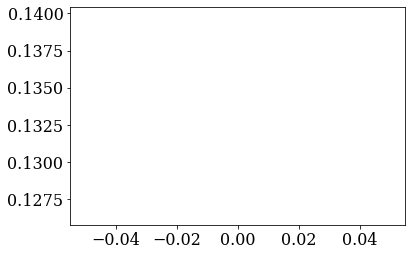

In [ ]:
from keras import backend as K

get_relu_output = K.function([model.layers[0].input], [model.layers[5].output])
relu_output = get_relu_output([val_x])
mean_activ = np.mean(relu_output[0],axis=0)
plt.plot(mean_activ)

In [ ]:
epoch_num = len(history.history['mean_absolute_error'])
epochs = np.arange(1,epoch_num+1)
mae = history.history['mean_absolute_error']
mape = np.array(history.history['mean_absolute_percentage_error'])
val_mae = np.array(history.history['val_mean_absolute_error'])
val_mape = np.array(history.history['val_mean_absolute_percentage_error'])
loss = history.history['loss']
val_loss = np.array(history.history['val_loss'])

NameError: name 'history' is not defined

In [ ]:
print(np.min(val_mape))

8.740983963012695


In [ ]:

val_mae_smooth = cf.exponetial_smoothing(val_mae,0.4)
val_loss_smooth = cf.exponetial_smoothing(val_loss,0.4)
val_mape_smooth = cf.exponetial_smoothing(val_mape,0.4)


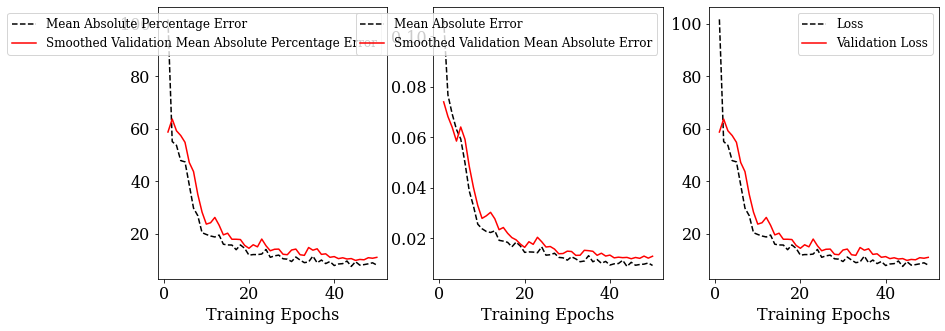

In [ ]:
matplotlib.rcParams.update({'legend.fontsize': 12})
fig_3, axs  = plt.subplots(1,3, figsize= (14,5))
axs[0].plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Percentage Error')
axs[0].plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Percentage Error')
axs[0].set_xlabel('Training Epochs')
#axs[0].set_yscale('log')
#axs[0].set_ylim(0,10)
axs[0].legend()

axs[1].plot(epochs,mae, c = 'black',linestyle = '--',label = 'Mean Absolute Error')
axs[1].plot(epochs,val_mae_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Error')
axs[1].set_xlabel('Training Epochs')
#axs[1].set_yscale('log')
axs[1].legend()

cut = None
axs[2].plot(epochs[:cut],loss[:cut], label = 'Loss',c = 'black',linestyle = '--')
axs[2].plot(epochs[:cut],val_loss_smooth[:cut], label = 'Validation Loss',c = 'red')
axs[2].set_xlabel('Training Epochs')
#axs[2].set_yscale('log')
axs[2].legend()

In [ ]:
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))
print('')

Mean Potential Value =  -0.13889586045126806



In [ ]:
fig.savefig('../../Figures/Pions_uniform.png',dpi = 200)
fig_2.savefig('../../Figures/potential.png',dpi = 200)
fig_3.savefig('../../Figures/Inital_poc.png',dpi = 200)


In [ ]:
test_data = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data_2.csv',header = None))
test_data.shape

(100000, 17)

In [ ]:
#test = np.hstack((test_pi,test_dpi,test_V))
result = ((model.predict(test_data)))

ValueError: in user code:

    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 16 but received input with shape (32, 17)


In [ ]:
mean = []
chunk = 100
chunk_size  = len(result)//chunk
for i in range(chunk):
    mean.append(np.mean(abs(np.array((result+test_V)/test_V))[chunk_size*i:chunk_size*(i+1)]))
mean = np.array(mean)
std = np.std(mean)
mean = np.mean(mean)
print('mean is = ', mean, 'STD is = ', std)



NameError: name 'result' is not defined

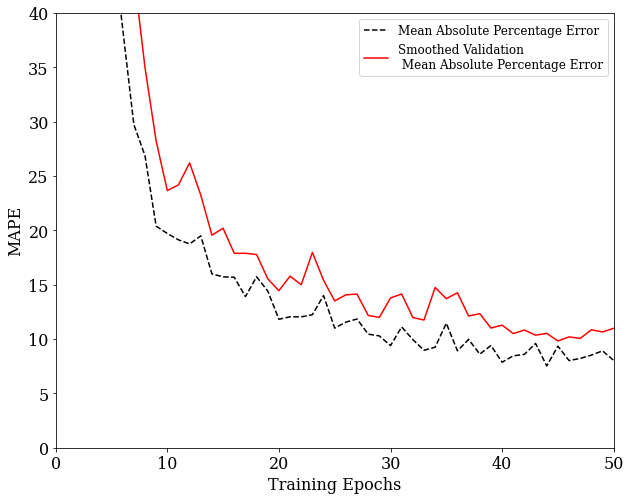

In [ ]:

fig_4, axs  = plt.subplots(1,1, figsize= (10,8))

axs.plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Percentage Error')
axs.plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation \n Mean Absolute Percentage Error')


axs.set_xlabel('Training Epochs', )
axs.set_ylabel('MAPE')
#axs.set_yscale('log')
axs.set_ylim(0,40)
axs.set_xlim(0,50)
axs.legend()



In [ ]:
fig_4.savefig('../../Figures/flat_yet_decreasing.png',dpi = 200)